<ipython-input-1-11bafd75359c>:57: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


(array([ 6., 39., 85., 40., 26.]),
 array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5]),
 <a list of 5 Patch objects>)

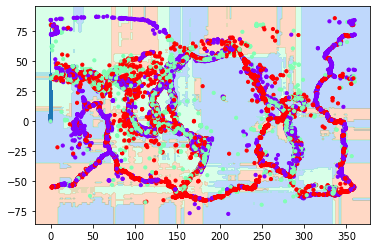

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 12:13:37 2020

@author: max
"""
import numpy as np
import matplotlib.pyplot as plt
from pandas import cut
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier





mechstr = np.genfromtxt('/home/max/Documents/Lectures/Machine Learning/global_mech.out', dtype='unicode',skip_header=1)
mechdata = np.genfromtxt('/home/max/Documents/Lectures/Machine Learning/global_mech.out', skip_header=1)
moment = np.genfromtxt('/home/max/Documents/Lectures/Machine Learning/jan76_dec17.moment')
le = preprocessing.LabelEncoder()
le.fit(mechstr[:,13])
labels = le.transform(mechstr[:,13])
dlabels = cut(labels,[-1,1,3,6],labels=range(3))

lon = mechdata[:,0]
lat = mechdata[:,1]
depth = mechdata[:,2]
mag = np.log10(moment[:,3])
tree = DecisionTreeClassifier(max_depth=8)
clf=RandomForestClassifier(n_estimators=100)

ina = np.transpose([lon,lat,mag, depth])

#plt.scatter(ina[:, 0], ina[:, 1], c=dlabels, s=30, cmap='jet')
#plt.show()
#visualize_classifier(clf, ina , dlabels)
ax = plt.gca()
    
    # Plot the training points
ax.scatter(ina[:, 0], ina[:, 1], c=dlabels, s=10, cmap='rainbow',
               clim=(dlabels.min(), dlabels.max()), zorder=3)
ax.axis('tight')
    #ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
    # fit the estimator
clf.fit(ina, dlabels)
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(),18*np.ones(xx.size),100*np.ones(xx.size)]).reshape(xx.shape)

    # Create a color plot with the results
n_classes = len(np.unique(dlabels))
contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(dlabels.min(), dlabels.max()),
                           zorder=1)

ax.set(xlim=xlim, ylim=ylim)

y = clf.feature_importances_

maystr = np.genfromtxt('/home/max/Documents/Lectures/Machine Learning/may20.out', dtype='unicode',skip_header=1)
maydata = np.genfromtxt('/home/max/Documents/Lectures/Machine Learning/may20.out', skip_header=1)
maymoment = np.genfromtxt('/home/max/Documents/Lectures/Machine Learning/may20.moment')
mmag = np.log10(maymoment[:,3])
mlon = maydata[:,0]
mlat =maydata[:,1]
mdepth = maydata[:,0]
fore = np.transpose([mlon,mlat,mdepth,mmag])
p = clf.predict(fore)
plabels= cut(le.transform(maystr[:,13]),[-1,1,3,6],labels=False)
plt.hist(p-plabels,bins=[-2.5,-1.5,-0.5,0.5,1.5,2.5])